# Testing Hospitalbeds and Doctors Density as explanatory variable for death rate

## Code book

### For Covid-19 data

#### Variables and their units

- We have the dataframe df_infected which contains the number of people tested positive on covid-19
- dates (columns): days of the year 2020 from end of January to today with the respective number of infected/deaths 
- deaths (entries of df_deaths): number of people died of covid-19
- Infected (entries of df_infected): number of people tested positive on covid-19
- Countries (index): Names of all Countries that maintain a record of their covid-19 cases
- Continents (column): Names of all Continents excluding Antarctica

#### Summary choices made

- Created seperate df (df_infected) where only the latest date is displayed with additional information of the respective infected once
- Created df for continents by introducing a column and groupby function
- We computed additionaly death rate: number of deaths / number of infected


### For hospitalbeds/ medical doctors data

#### Variables and their units

- Our Dataframe called democracy containes following columns
    - Country : Name of Country (index)
    - Year : time of data acquisition
    - Hospital beds (per 10 000 population) : ratio of hospitalbeds to 10 000
    - Medical doctors (per 10 000 population) : ratio of doctors

#### Summary choices made


- We took the most recent number of hospitalbeds for each country so the date may differ
- We took the most recent number of medical doctors for each country so the date may differ
- Region will be changed to the respective continent of the country



In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data from: https://github.com/CSSEGISandData/COVID-19

In [207]:
#import data of deaths and infected
deaths = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
infected = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
infected_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#add a column called United States to the US datasets so that they are compatible
deaths_US['Country/Region'] = 'United States'
infected_US['Country/Region'] = 'United States'


#statistics for countries (group all regions together)
deaths = deaths.groupby('Country/Region').sum() 
infected = infected.groupby('Country/Region').sum() 
#sum over all states in the US
deaths_US = deaths_US.groupby('Country/Region').sum()
infected_US = infected_US.groupby('Country/Region').sum()

#take just the most recent day (i.e. data) for analysis
deaths = deaths[deaths.columns[-1]]
infected = infected[infected.columns[-1]]
deaths_US = deaths_US[deaths_US.columns[-1]]
infected_US = infected_US[infected_US.columns[-1]]
deaths = deaths.append(deaths_US)
infected = infected.append(infected_US)

#create a pd.series with contains deathrates for all countries within the datasets
deathrate = deaths/infected
countries_deathrate = deathrate.index

data from: https://apps.who.int/gho/data/view.main.HS07v

In [208]:
hospitalbeds = pd.read_csv('./csv/hospitalbeds_4.csv')

In [209]:
hospitalbeds.head()

,Country,Year,Hospital beds (per 10 000 population)
0,Afghanistan,2015,5
1,Afghanistan,2014,5
2,Afghanistan,2013,5
3,Afghanistan,2012,5
4,Afghanistan,2011,4


In [210]:
#get for each country the latest data
hospitalbeds = hospitalbeds.drop_duplicates(subset="Country")

In [211]:
hospitalbeds['Country']

0                                             Afghanistan
16                                                Albania
29                                                Algeria
31                                                 Angola
32                                    Antigua and Barbuda
36                                              Argentina
42                                                Armenia
57                                              Australia
59                                                Austria
73                                             Azerbaijan
87                                                Bahamas
93                                                Bahrain
108                                            Bangladesh
110                                              Barbados
115                                               Belarus
129                                               Belgium
144                                                Belize
150           

In [212]:
#loop through hospitalbeds and create new df that contains only these elements
#that are part of deathrate.index since for function series.get() we have to make sure that all values are part of series index

final_hospitalbed = pd.DataFrame()
for index, row in hospitalbeds.iterrows():
    if row['Country'] in countries_deathrate:
          final_hospitalbed = final_hospitalbed.append(row)

In [213]:
countries_we_want = final_hospitalbed['Country']

In [214]:
deathrate = deathrate.get(countries_we_want)

In [215]:
hospitalbeds = final_hospitalbed

In [216]:
hospitalbeds.set_index('Country', inplace = True)

In [217]:
hospitalbeds.sort_index(inplace = True)

In [218]:
hospitalbeds['deathrate'] = deathrate

In [219]:
hospitalbeds.head()

,Hospital beds (per 10 000 population),Year,deathrate
Country,,,
Afghanistan,5.0,2015.0,0.023259
Albania,29.0,2013.0,0.032666
Algeria,19.0,2015.0,0.076047
Angola,8.0,2005.0,0.057692
Antigua and Barbuda,38.0,2014.0,0.120000


In [220]:
hospitalbeds.loc['Switzerland']

Hospital beds (per 10 000 population)      47.000000
Year                                     2013.000000
deathrate                                   0.061761
Name: Switzerland, dtype: float64

## Scatterplot

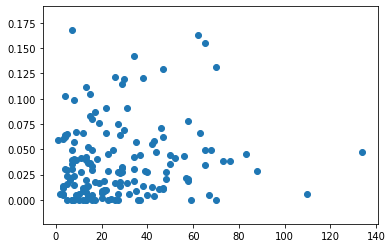

In [221]:
plt.scatter(hospitalbeds['Hospital beds (per 10 000 population)'], hospitalbeds['deathrate'])

## Doing the same thing for medical doctors

### Next steps
- import additional data -_check_
- transform data that one has a death rate for the countries where we information about smoking prevalence -_check_
- make a scatterplot -_check_
- if data looks reasonable well for linear regression -_wait_
    - make histogram of both variables
    - fit linearmodel
    - check if the assumptions hold
    - interpret the results (interpret the linear equation)
    - plot the linear model with the data

data from: https://apps.who.int/gho/data/view.main.HWFMEDv

In [222]:
doctors = pd.read_csv('./csv/medical_doctors.csv')

In [223]:
doctors = doctors[['Country', 'Year', 'Medical doctors (per 10 000 population)']]

In [224]:
doctors.head()

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2016,2.782
1,Afghanistan,2015,2.850
2,Afghanistan,2014,2.983
3,Afghanistan,2013,2.846
4,Afghanistan,2012,2.414


In [225]:
#get for each country the latest data
doctors = doctors.drop_duplicates(subset="Country")

In [226]:
doctors.head()

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2016,2.782
12,Albania,2016,12.164
35,Algeria,2018,17.193
41,Andorra,2015,33.333
54,Angola,2017,2.146


In [227]:
#loop through hospitalbeds and create new df that contains only these elements
#that are part of deathrate.index since for function series.get() we have to make sure that all values are part of series index

final_doctors = pd.DataFrame()
for index, row in doctors.iterrows():
    if row['Country'] in countries_deathrate:
          final_doctors = final_doctors.append(row)

In [228]:
countries_we_want = final_doctors['Country']

In [229]:
deathrate = deaths/infected
deathrate = deathrate.get(countries_we_want)

In [230]:
doctors = final_doctors

In [231]:
doctors.set_index('Country', inplace = True)

In [232]:
doctors.sort_index(inplace = True)

In [233]:
doctors['deathrate'] = deathrate

In [234]:
doctors.loc['Switzerland']

Medical doctors (per 10 000 population)      42.957000
Year                                       2017.000000
deathrate                                     0.061761
Name: Switzerland, dtype: float64

In [235]:
doctors.head()

,Medical doctors (per 10 000 population),Year,deathrate
Country,,,
Afghanistan,2.782,2016.0,0.023259
Albania,12.164,2016.0,0.032666
Algeria,17.193,2018.0,0.076047
Andorra,33.333,2015.0,0.067017
Angola,2.146,2017.0,0.057692


## Scatterplot

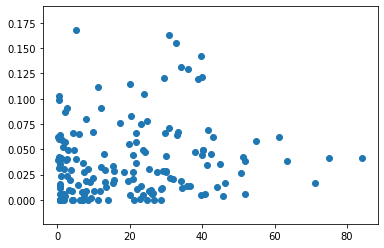

In [236]:
plt.scatter(doctors['Medical doctors (per 10 000 population)'], doctors['deathrate'])

## Plots with plotly

In [237]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc

In [238]:
#Jupyter setup (to display in notebook)
init_notebook_mode(connected=True)

In [239]:
countries = np.asarray(list(doctors.index))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting continent Information, insert at position 1, with column name 'continent'
doctors.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

doctors.loc[doctors.index=='Timor-Leste', 'continent'] = 'Asia'
doctors.loc[doctors.index=='Western Sahara', 'continent'] = 'Africa'

In [240]:
countries
continents

{'NA': 'North America',
 'SA': 'South America',
 'AS': 'Asia',
 'OC': 'Australia',
 'AF': 'Africa',
 'EU': 'Europe',
 'na': 'Others'}

In [241]:
doctors.head()

,Medical doctors (per 10 000 population),continent,Year,deathrate
Country,,,,
Afghanistan,2.782,Asia,2016.0,0.023259
Albania,12.164,Europe,2016.0,0.032666
Algeria,17.193,Africa,2018.0,0.076047
Andorra,33.333,Europe,2015.0,0.067017
Angola,2.146,Africa,2017.0,0.057692


In [242]:
fig = px.scatter(doctors,
    x = 'Medical doctors (per 10 000 population)',
    y = 'deathrate',
    hover_name=countries,
    color='continent',
    title='Medical doctors vs. death rate')

fig.update_layout(
    yaxis_title="death rate"
    )

fig.show()


In [243]:
countries = np.asarray(list(hospitalbeds.index))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'
#Collecting continent Information, insert at position 1, with column name 'continent'
hospitalbeds.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

hospitalbeds.loc[hospitalbeds.index=='Timor-Leste', 'continent'] = 'Asia'
hospitalbeds.loc[hospitalbeds.index=='Western Sahara', 'continent'] = 'Africa'

In [244]:
hospitalbeds.head()

,Hospital beds (per 10 000 population),continent,Year,deathrate
Country,,,,
Afghanistan,5.0,Asia,2015.0,0.023259
Albania,29.0,Europe,2013.0,0.032666
Algeria,19.0,Africa,2015.0,0.076047
Angola,8.0,Africa,2005.0,0.057692
Antigua and Barbuda,38.0,North America,2014.0,0.120000


In [246]:
fig = px.scatter(hospitalbeds,
    x = 'Hospital beds (per 10 000 population)',
    y = 'deathrate',
    hover_name=countries,
    color='continent',
    title='Hospitalbeds vs. death rate')

fig.update_layout(
    yaxis_title="death rate"
    )

fig.show()
